In [26]:
import numpy as np
import pandas as pd

In [27]:
# Timestamp
pd.Timestamp('6th jan 2025 8:10')
# DatetimeIndex -> df and series index
pd.DatetimeIndex([pd.Timestamp('6th jan 2025 8:10'),pd.Timestamp('7th jan 2025 8:10'),pd.Timestamp('8th jan 2025 8:10')])[0]
# date_range()
pd.date_range(start='2025-1-6',end='2027-1-31',freq='D')
# to_datetime()
s = pd.Series(['2025/1/6','2025/1/7','2025/1/7'])
pd.to_datetime(s).dt.day_name()

,0
0,Monday
1,Tuesday
2,Tuesday


### Timedelta Object

Represents a duration, the difference between two dates or times.

In [28]:
# create using Timestamp objects
t1 = pd.Timestamp('6th Jan 2025 8:20:14')
t2 = pd.Timestamp('26th Jan 2025 10:00:00')

t2 - t1

Timedelta('20 days 01:39:46')

In [29]:
# standalone creation
pd.Timedelta(days=2,hours=10,minutes=35)

Timedelta('2 days 10:35:00')

In [30]:
# arithmetic
pd.Timestamp('6th jan 2023') + pd.Timedelta(days=2,hours=10,minutes=35)

Timestamp('2023-01-08 10:35:00')

In [31]:
pd.date_range(start='2025-1-6',end='2025-1-31',freq='D') - pd.Timedelta(days=2,hours=10,minutes=35)

DatetimeIndex(['2025-01-03 13:25:00', '2025-01-04 13:25:00',
               '2025-01-05 13:25:00', '2025-01-06 13:25:00',
               '2025-01-07 13:25:00', '2025-01-08 13:25:00',
               '2025-01-09 13:25:00', '2025-01-10 13:25:00',
               '2025-01-11 13:25:00', '2025-01-12 13:25:00',
               '2025-01-13 13:25:00', '2025-01-14 13:25:00',
               '2025-01-15 13:25:00', '2025-01-16 13:25:00',
               '2025-01-17 13:25:00', '2025-01-18 13:25:00',
               '2025-01-19 13:25:00', '2025-01-20 13:25:00',
               '2025-01-21 13:25:00', '2025-01-22 13:25:00',
               '2025-01-23 13:25:00', '2025-01-24 13:25:00',
               '2025-01-25 13:25:00', '2025-01-26 13:25:00',
               '2025-01-27 13:25:00', '2025-01-28 13:25:00'],
              dtype='datetime64[ns]', freq='D')

In [32]:
# real life example
df = pd.read_csv('deliveries.csv')
df.head()

,order_date,delivery_date
0,5/24/98,2/5/99
1,4/22/92,3/6/98
2,2/10/91,8/26/92
3,7/21/92,11/20/97
4,9/2/93,6/10/98


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_date     501 non-null    object
 1   delivery_date  501 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


In [34]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

<ipython-input-34-481df77f7c5d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date'] = pd.to_datetime(df['order_date'])
<ipython-input-34-481df77f7c5d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['delivery_date'] = pd.to_datetime(df['delivery_date'])


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_date     501 non-null    datetime64[ns]
 1   delivery_date  501 non-null    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 8.0 KB


In [36]:
df['delivery_time_period'] = df['delivery_date'] - df['order_date']
df['delivery_time_period'].mean()

Timedelta('1217 days 22:53:53.532934128')

### Time series

A time series is a data set that tracks a sample over time. In particular, a time series allows one to see what factors influence certain variables from period to period. Time series analysis can be useful to see how a given asset, security, or economic variable changes over time.

Examples

- Financial Data (Company stocks)
- Natural Data (Rainfall measurement)
- Event Data (Covid)
- Medical Data (Heart rate monitoring)

Types of Operations done on Time Series

- Time Series Analysis
- Time Series Forecasting

In [37]:
google = pd.read_csv('google.csv')
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [38]:
google.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4466,2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
4467,2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
4468,2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100
4469,2022-05-19,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600
4470,2022-05-20,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100


In [39]:
subs = pd.read_csv('subscribers.csv')
views = pd.read_csv('views.csv')
wt = pd.read_csv('watch-time.csv')
comments = pd.read_csv('comments.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'subscribers.csv'

In [40]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4471 non-null   object 
 1   Open       4471 non-null   float64
 2   High       4471 non-null   float64
 3   Low        4471 non-null   float64
 4   Close      4471 non-null   float64
 5   Adj Close  4471 non-null   float64
 6   Volume     4471 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 244.6+ KB


In [41]:
google['Date'] = pd.to_datetime(google['Date'])

In [42]:
google.set_index('Date',inplace=True)

In [43]:
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [44]:
# fetch a specific date
google.loc['2021-12-30']

,2021-12-30
Open,2929.000000
High,2941.250000
Low,2915.169922
Close,2920.050049
Adj Close,2920.050049
Volume,648900.000000


In [46]:
google['month_name'] = google.index.month_name()
google['weekday_name'] = google.index.day_name()
google['quarter'] = google.index.quarter

google.head()

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,Monday,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,Tuesday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,Wednesday,3


In [48]:
google.loc['2002-12-15':'2021-1-1':2]

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,Monday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,Wednesday,3
2004-08-27,53.848164,54.107193,52.647663,52.876804,52.876804,6241307,August,Friday,3
2004-08-31,50.958992,51.661362,50.889256,50.993862,50.993862,4941252,August,Tuesday,3
...,...,...,...,...,...,...,...,...,...
2020-12-17,1768.510010,1771.784058,1738.660034,1747.900024,1747.900024,1624700,December,Thursday,4
2020-12-21,1713.510010,1740.849976,1699.000000,1739.369995,1739.369995,1828400,December,Monday,4
2020-12-23,1728.109985,1747.989990,1725.040039,1732.380005,1732.380005,1033800,December,Wednesday,4


In [51]:
# challenge -> fetch info for a particular date every year -> limitation of timedelta
google[google.index.isin(pd.date_range(start='2005-1-6',end='2022-1-6',freq=pd.DateOffset(years=1)))]

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2005-01-06,97.175758,97.584229,93.509506,93.922951,93.922951,20852067,January,Thursday,1
2006-01-06,227.581970,234.371521,225.773743,231.960556,231.960556,35646914,January,Friday,1
2009-01-06,165.868286,169.763687,162.585587,166.406265,166.406265,12898566,January,Tuesday,1
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987226,January,Wednesday,1
2011-01-06,304.199799,308.060303,303.885956,305.604523,305.604523,4131026,January,Thursday,1
2012-01-06,328.344299,328.767700,323.681763,323.796326,323.796326,5405987,January,Friday,1
2014-01-06,554.426880,557.340942,551.154114,556.573853,556.573853,3551864,January,Monday,1
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940,January,Tuesday,1
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000,January,Wednesday,1


<Axes: xlabel='Date'>

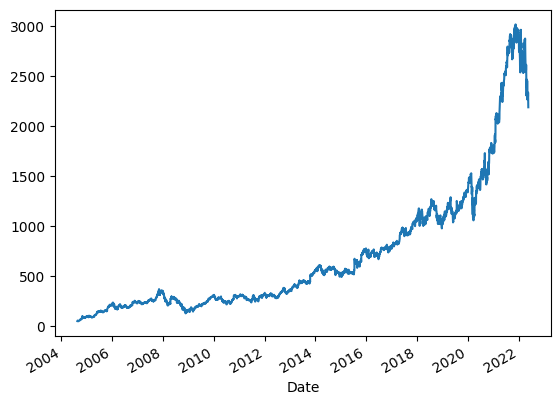

In [52]:
# viz a single col
google['Close'].plot()

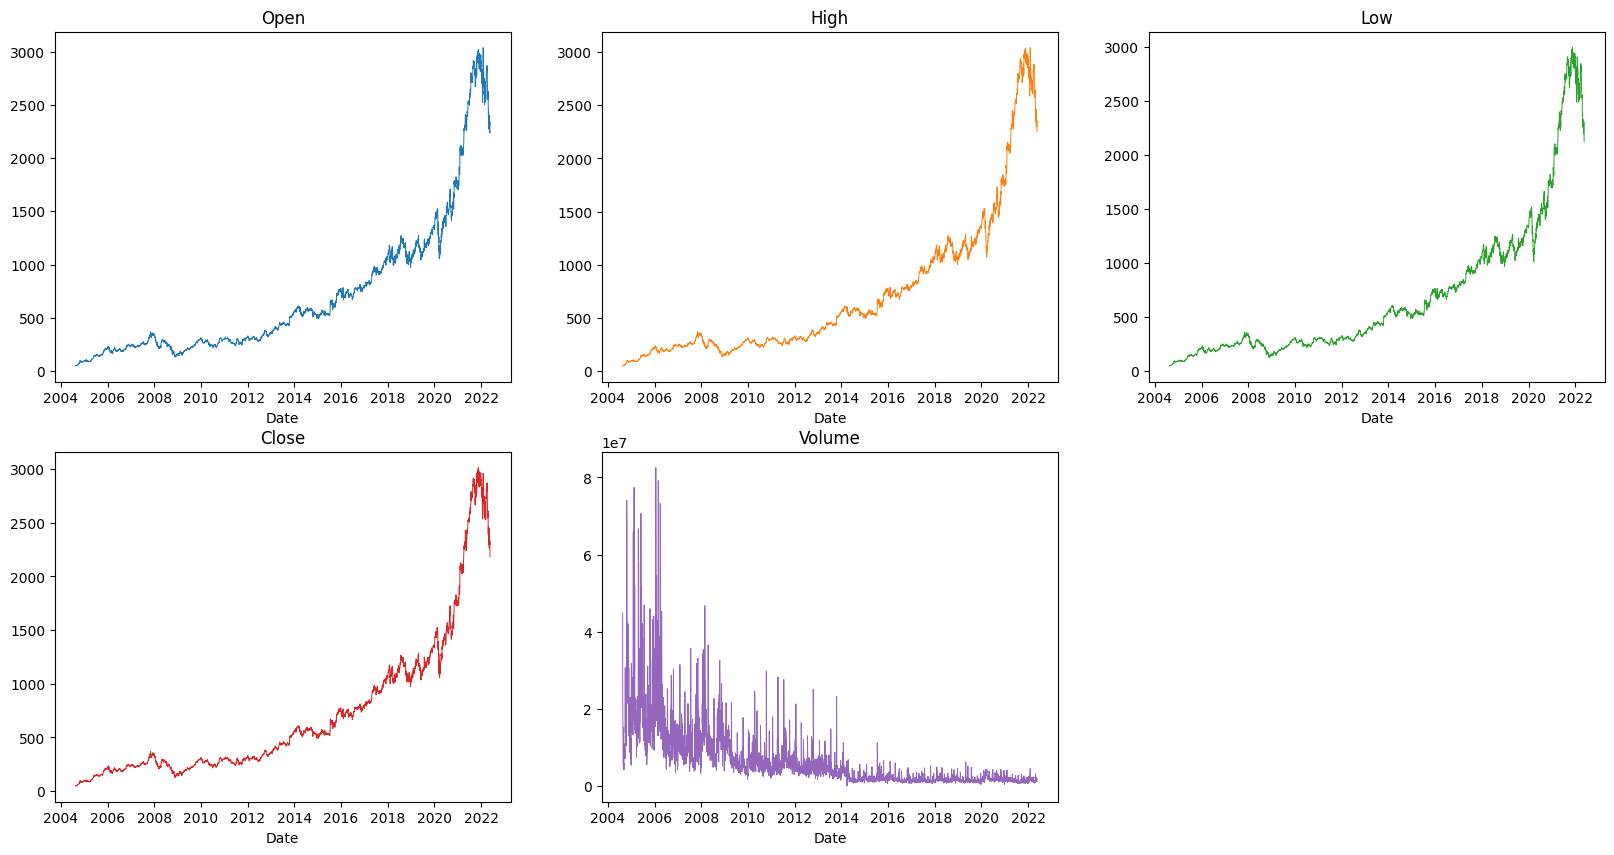

In [54]:
# viz all cols together
subset_google = google[['Open', 'High', 'Low', 'Close','Volume']]
ax = subset_google.plot(subplots=True,
                    layout=(2, 3),
                     sharex=False,
                     sharey=False,
                     linewidth=0.7,
                     fontsize=10,
                     legend=False,
                      figsize=(20,10),
                      title=['Open', 'High', 'Low', 'Close','Volume'])

<Axes: xlabel='Date'>

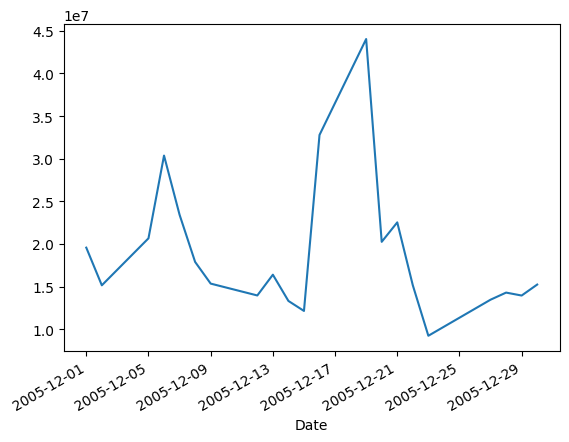

In [57]:
# plot for a particular year/month/week
google.loc['2005-12']['Volume'].plot()

<Axes: xlabel='Date'>

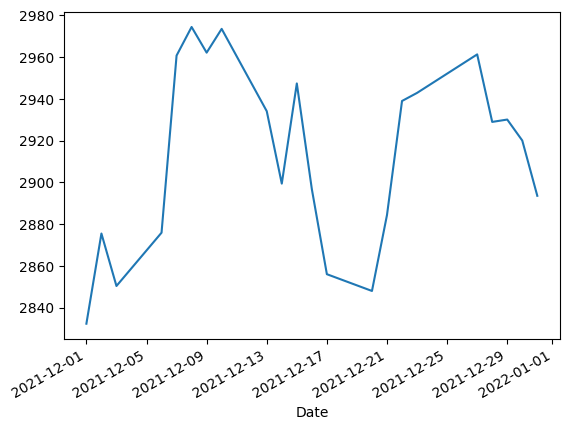

In [58]:
google.loc['2021-12']['Close'].plot()

<Axes: xlabel='month_name'>

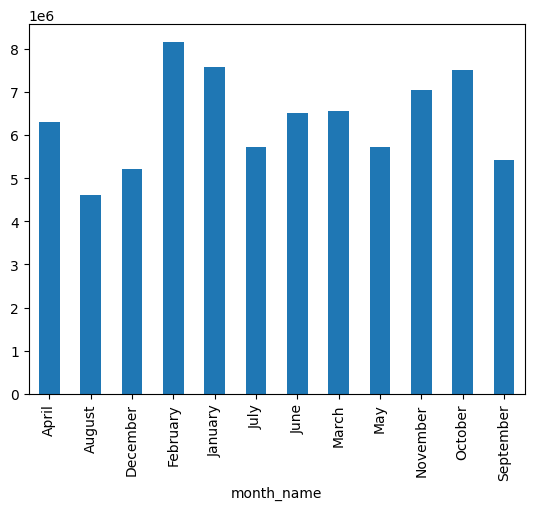

In [59]:
# monthly trend
google.groupby('month_name')['Volume'].mean().plot(kind='bar')

<Axes: xlabel='weekday_name'>

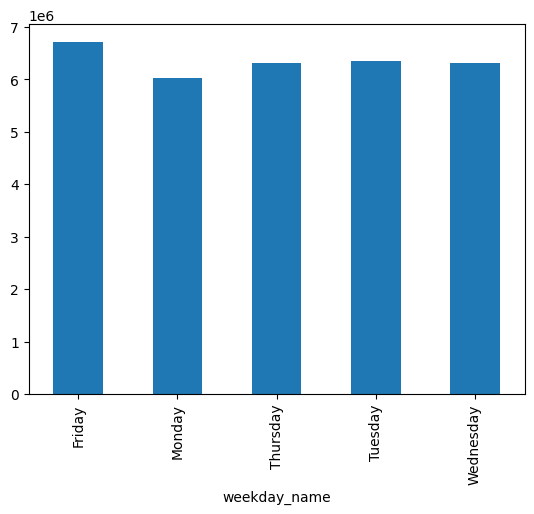

In [61]:
# yearly trend
google.groupby('weekday_name')['Volume'].mean().plot(kind='bar')

<Axes: xlabel='month_name'>

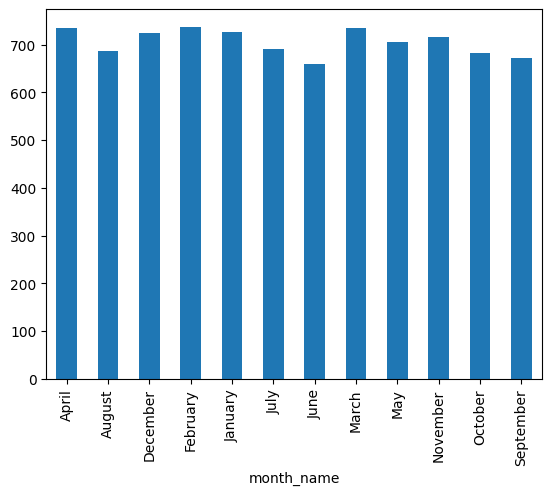

In [62]:
google.groupby('month_name')['Close'].mean().plot(kind='bar')

<Axes: xlabel='quarter'>

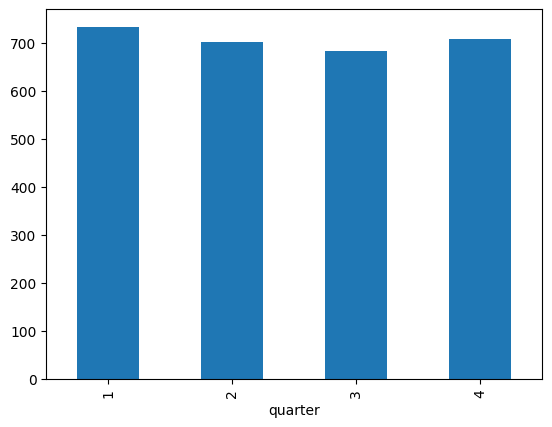

In [63]:
# quaterly trend
google.groupby('quarter')['Close'].mean().plot(kind='bar')

In [64]:
# frequency
google.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=4471, freq=None)

In [66]:
# asfreq
google.asfreq('6h',method='bfill')

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19 00:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-19 06:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-19 12:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-19 18:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-20 00:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
...,...,...,...,...,...,...,...,...,...
2022-05-19 00:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600,May,Thursday,2
2022-05-19 06:00:00,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100,May,Friday,2
2022-05-19 12:00:00,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100,May,Friday,2


### Resampling

Resampling involves changing the frequency of your time series observations.

Two types of resampling are:

**Upsampling**: Where you increase the frequency of the samples, such as from minutes to seconds.<br>
**Downsampling**: Where you decrease the frequency of the samples, such as from days to months.

<ipython-input-67-3ceab6dce0b5>:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  google['Volume'].resample('Y').mean().plot()


<Axes: xlabel='Date'>

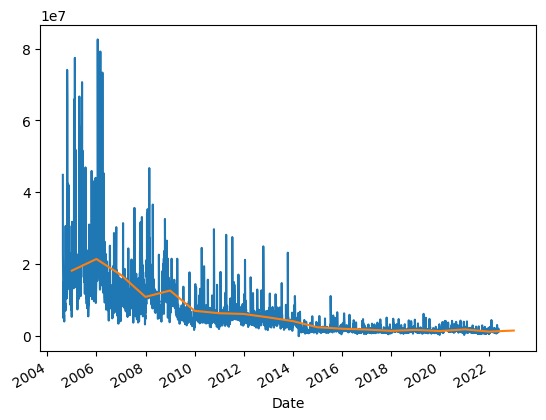

In [67]:
# Downsampling
google['Volume'].plot()
google['Volume'].resample('Y').mean().plot()

<Axes: xlabel='Date'>

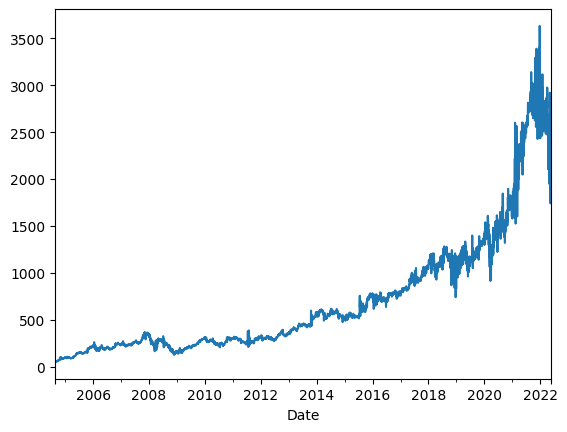

In [69]:
# Upsampling
google['Close'].resample('12h').interpolate(method='spline',order=2).plot()

### Rolling Window(Smoothing)
Time series data in original format can be quite volatile, especially on smaller aggregation levels. The concept of rolling, or moving averages is a useful technique for smoothing time series data.

<Axes: title={'center': 'ewm'}, xlabel='Date'>

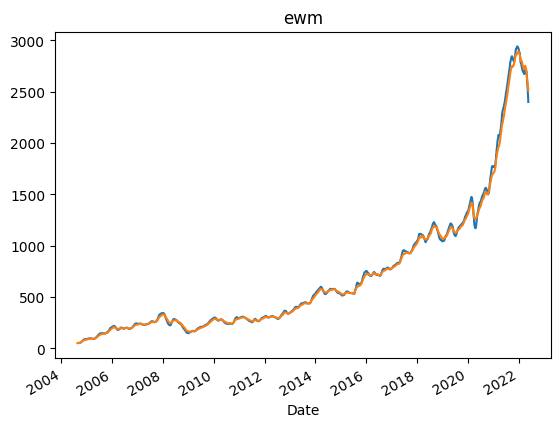

In [70]:
# Rolling window
google['Close'].rolling(30).mean().plot(title='rolling')
google['Close'].ewm(30).mean().plot(title='ewm')


### Shifting

The shift() function is Pandas is used to, well, shift the entire series up or down by the desired number of periods.

In [72]:
google['Volume']

,Volume
Date,
2004-08-19,44871361
2004-08-20,22942874
2004-08-23,18342897
2004-08-24,15319808
2004-08-25,9232276
...,...
2022-05-16,1164100
2022-05-17,1078800
2022-05-18,1399100


In [73]:
google['Volume'].shift(1)

,Volume
Date,
2004-08-19,NaN
2004-08-20,44871361.0
2004-08-23,22942874.0
2004-08-24,18342897.0
2004-08-25,15319808.0
...,...
2022-05-16,1486000.0
2022-05-17,1164100.0
2022-05-18,1078800.0


In [74]:
google['Volume'].shift(-1)

,Volume
Date,
2004-08-19,22942874.0
2004-08-20,18342897.0
2004-08-23,15319808.0
2004-08-24,9232276.0
2004-08-25,7128620.0
...,...
2022-05-16,1078800.0
2022-05-17,1399100.0
2022-05-18,1459600.0


In [75]:
# shift example
df = pd.read_csv('/content/login.csv',header=None)
df = df[[1,2]]
df.head()
df.rename(columns={1:'user_id',2:'login_time'},inplace=True)
df.head()

,user_id,login_time
0,466,2017-01-07 18:24:07
1,466,2017-01-07 18:24:55
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
4,592,2017-01-07 19:09:59


In [76]:
user_df = df[df['user_id'] == 458]
user_df.head()

,user_id,login_time
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
9,458,2017-01-09 11:13:12
10,458,2017-01-09 11:34:02
25,458,2017-01-10 12:14:11


In [77]:
user_df['login_time'] = pd.to_datetime(user_df['login_time'])
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 2 to 1018
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     208 non-null    int64         
 1   login_time  208 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.0 KB


<ipython-input-77-fd41e73e6ce6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['login_time'] = pd.to_datetime(user_df['login_time'])


In [78]:
user_df['shifted'] = user_df['login_time'].shift(1)
(user_df['login_time'] - user_df['shifted']).mean()

<ipython-input-78-091b95be4a6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['shifted'] = user_df['login_time'].shift(1)


Timedelta('0 days 17:29:22.053140096')

ValueError: The length of `title` must equal the number of columns if using `title` of type `list` and `subplots=True`.
length of title = 6
number of columns = 1

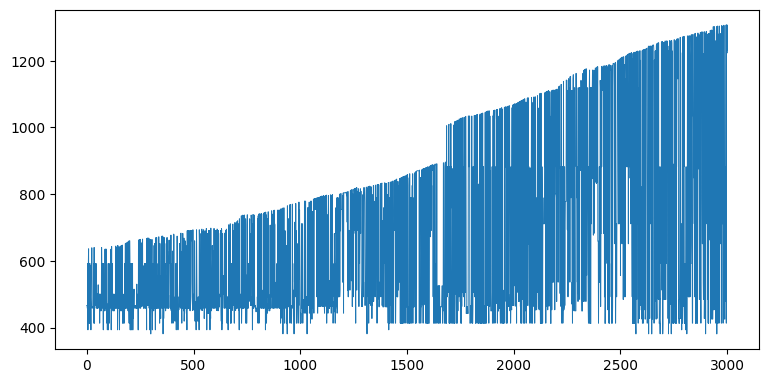

In [79]:
ax = df.plot(subplots=True,
                    layout=(3, 2),
                     sharex=False,
                     sharey=False,
                     linewidth=0.7,
                     fontsize=10,
                     legend=False,
                      figsize=(20,15),
                      title=['Open', 'High', 'Low', 'Close','Adjusted Close', 'Volume'])